## Separa os dados de treino e teste, treina o modelo e faz a predição do preço da cenoura

In [149]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
# carrega arquivos limpos e tratados
iax = pd.read_csv('arquivos_tratados/iax.csv')
vaaax = pd.read_csv('arquivos_tratados/vaaax.csv')

In [151]:
# verifica os tipos de variáveis, não será usado a data_med
print(iax.info())
print(vaaax.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Preço_kg         46 non-null     float64
 1   precipitação_mm  46 non-null     float64
 2   temp_max         46 non-null     float64
 3   data_med         46 non-null     object 
dtypes: float64(3), object(1)
memory usage: 1.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Preço_kg         40 non-null     float64
 1   precipitação_mm  40 non-null     float64
 2   temp_max         40 non-null     float64
 3   data_med         40 non-null     object 
dtypes: float64(3), object(1)
memory usage: 1.4+ KB
None


In [152]:
# separa o modelo em treino e teste
from sklearn.model_selection import train_test_split

Xi = iax[['temp_max','precipitação_mm']]
#Xi = iax[['temp_max']]
yi = iax.Preço_kg

Xv = iax[['temp_max','precipitação_mm']]
#Xv = iax[['temp_max']]
yv = iax.Preço_kg

Xvv = vaaax[['temp_max','precipitação_mm']]
#Xv = vaaax[['temp_max']]
yvv = vaaax.Preço_kg

In [153]:
# visualiza x e y de inverno e verão
print('inverno A')
print(Xi.head(5))
print(yi.head(5))

print(' ')
print('verão AAA')
print(Xvv.head(5))
print(yvv.head(5))

inverno A
   temp_max  precipitação_mm
0      28.5              0.0
1      26.9              0.0
2      26.9              0.0
3      29.9              0.0
4      27.3             10.4
0    1.54
1    1.54
2    1.48
3    1.34
4    1.10
Name: Preço_kg, dtype: float64
 
verão AAA
   temp_max  precipitação_mm
0      29.7             69.8
1      28.7            112.8
2      29.8             67.0
3      28.9             83.0
4      29.8             32.2
0    2.93
1    2.93
2    2.93
3    2.97
4    4.17
Name: Preço_kg, dtype: float64


In [154]:
# treina modelos de inverno e verão
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.30, random_state=42)
Xv_train, Xv_test, yv_train, yv_test = train_test_split(Xv, yv, test_size=0.30, random_state=41)

## Regressão Linear Simples

- Usando dados de cenoura inverno A e cenoura verão AAA

In [155]:
# Faz a regressão e o fit com os dados
from sklearn.linear_model import LinearRegression

regi_temp_max = LinearRegression().fit(Xi_train.temp_max.values.reshape(-1,1), yi_train)
regi_precipitação_mm = LinearRegression().fit(Xi_train.precipitação_mm.values.reshape(-1,1), yi_train)

regv_temp_max = LinearRegression().fit(Xv_train.temp_max.values.reshape(-1,1), yv_train)
regv_precipitação_mm = LinearRegression().fit(Xv_train.precipitação_mm.values.reshape(-1,1), yv_train)

In [156]:
# Verifica o coeficiente de determinação
print('temp_max - inverno')
print(regi_temp_max.score(Xi_train.temp_max.values.reshape(-1,1), yi_train))
print(regi_temp_max.score(Xi_test.temp_max.values.reshape(-1,1), yi_test))
 
print(' ')
print('precipitação_mm - inverno')
print(regi_precipitação_mm.score(Xi_train.precipitação_mm.values.reshape(-1,1), yi_train))
print(regi_precipitação_mm.score(Xi_test.precipitação_mm.values.reshape(-1,1), yi_test))
 
print(' ')
print('temp_max - verão')
print(regv_temp_max.score(Xv_train.temp_max.values.reshape(-1,1), yv_train))
print(regv_temp_max.score(Xv_test.temp_max.values.reshape(-1,1), yv_test))
 
print(' ')
print('precipitação_mm - verão')
print(regv_precipitação_mm.score(Xv_train.precipitação_mm.values.reshape(-1,1), yv_train))
print(regv_precipitação_mm.score(Xv_test.precipitação_mm.values.reshape(-1,1), yv_test))
 

temp_max - inverno
0.1352175276105021
0.3187632861769245
 
precipitação_mm - inverno
0.008504211419591234
-0.1484909523695097
 
temp_max - verão
0.233304618178366
0.09561664464805508
 
precipitação_mm - verão
0.0018155643802927335
-6.058782190643264e-05


- Avaliando os Modelos de inverno e verão

In [157]:
# Fazendo o predict para temp_max e precipitação_mm
yi_pred1 = regi_temp_max.predict(Xi_test.temp_max.values.reshape(-1,1))
yi_pred2 = regi_precipitação_mm.predict(Xi_test.precipitação_mm.values.reshape(-1,1))

yv_pred1 = regv_temp_max.predict(Xv_test.temp_max.values.reshape(-1,1))
yv_pred2 = regv_precipitação_mm.predict(Xv_test.precipitação_mm.values.reshape(-1,1))

In [158]:
# Avaliando o erro médio absoluto dos dados de TESTE
# Avaliando o erro quadrático médio para os dados de TESTE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('erro médio absoluto - inverno A - temperatura')
print(mean_absolute_error(yi_test, yi_pred1))
 
print('erro quadrático médio - inverno A - temperatura')
print(mean_squared_error(yi_test,yi_pred1))
 
print(' ')
print('erro médio absoluto - inverno A - precipitação')
print(mean_absolute_error(yi_test, yi_pred2))
#print(' ')
print('erro quadrático médio - inverno A - precipitação')
print(mean_squared_error(yi_test,yi_pred2))
 
print(' ')
print('erro médio absoluto - verão AAA - temperatura')
print(mean_absolute_error(yv_test, yv_pred1))
 
print('erro quadrático médio - verão AAA - temperatura')
print(mean_squared_error(yv_test,yv_pred1))
 
print(' ')
print('erro médio absoluto - verão AAA - precipitação')
print(mean_absolute_error(yv_test, yv_pred2))
#print(' ')
print('erro quadrático médio - verão AAA - precipitação')
print(mean_squared_error(yv_test,yv_pred2))
 

erro médio absoluto - inverno A - temperatura
0.314461829650537
erro quadrático médio - inverno A - temperatura
0.13778360106823653
 
erro médio absoluto - inverno A - precipitação
0.390596678050603
erro quadrático médio - inverno A - precipitação
0.2322881547644495
 
erro médio absoluto - verão AAA - temperatura
0.4051648565993625
erro quadrático médio - verão AAA - temperatura
0.23997950760287634
 
erro médio absoluto - verão AAA - precipitação
0.40333242371447586
erro quadrático médio - verão AAA - precipitação
0.2653676076835242


## Árvore de Regressão

In [159]:
# Importa as bibliotecas
from sklearn import tree
from sklearn.metrics import r2_score


In [160]:
# Cria o regressor
ri = tree.DecisionTreeRegressor(random_state=42)
rv = tree.DecisionTreeRegressor(random_state=41)

In [161]:
# Faz o fit
regi_Arvore = ri.fit(Xi_train, yi_train)
regv_Arvore = ri.fit(Xv_train, yv_train)

In [162]:
# Avalia o modelo
yi_predArvore = regi_Arvore.predict(Xi_test)
yv_predArvore = regv_Arvore.predict(Xv_test)

print('coeficiente de determinação da previsão - inverno A')
print(regi_Arvore.score(Xi_test, yi_test))
print(r2_score(yi_test, yi_predArvore))
print('erro médio absoluto e quadrático - inverno A')
print(mean_absolute_error(yi_test, yi_predArvore))
print(mean_squared_error(yi_test,yi_predArvore)) 

print(' ')
print('coeficiente de determinação da previsão - verão A')
print(regv_Arvore.score(Xv_test, yv_test))
print(r2_score(yv_test, yv_predArvore))
print('erro médio absoluto e quadrático - verão AAA')
print(mean_absolute_error(yv_test, yv_predArvore))
print(mean_squared_error(yv_test,yv_predArvore)) 

coeficiente de determinação da previsão - inverno A
0.9531885374098179
0.9531885374098179
erro médio absoluto e quadrático - inverno A
0.05714285714285715
0.009467857142857144
 
coeficiente de determinação da previsão - verão A
0.0744622554985781
0.0744622554985781
erro médio absoluto e quadrático - verão AAA
0.3564285714285714
0.2455928571428571


## SVR

In [163]:
# Importa o SVR
from sklearn import svm

In [164]:
# Cria o regressor
regSVR = svm.SVR()

In [165]:
# Faz o fit
regi_SVR = regSVR.fit(Xi_train, yi_train)
regv_SVR = regSVR.fit(Xv_train, yv_train)

In [166]:
# Avalia o modelo
yi_predSVR = regi_SVR.predict(Xi_test)
yv_predSVR = regv_SVR.predict(Xv_test)

print('coeficiente de determinação da previsão - inverno A')
print(regSVR.score(Xi_test, yi_test))
print(r2_score(yi_test, yi_predSVR, multioutput='variance_weighted'))
print('erro médio absoluto e quadrático - inverno A')
print(mean_absolute_error(yi_test, yi_predSVR))
print(mean_squared_error(yi_test,yi_predSVR))

print(' ')
print('coeficiente de determinação da previsão - verão AAA')
print(regSVR.score(Xv_test, yv_test))
print(r2_score(yv_test, yv_predSVR, multioutput='variance_weighted'))
print('erro médio absoluto e quadrático - verão AAA')
print(mean_absolute_error(yv_test, yv_predSVR))
print(mean_squared_error(yv_test,yv_predSVR))

coeficiente de determinação da previsão - inverno A
0.10227537256978647
0.10227537256978649
erro médio absoluto e quadrático - inverno A
0.33652938207114136
0.18156938612545165
 
coeficiente de determinação da previsão - verão AAA
-0.10294187191839033
-0.10294187191839033
erro médio absoluto e quadrático - verão AAA
0.42807305946138346
0.2926673138898794


## Visualiza as Informações

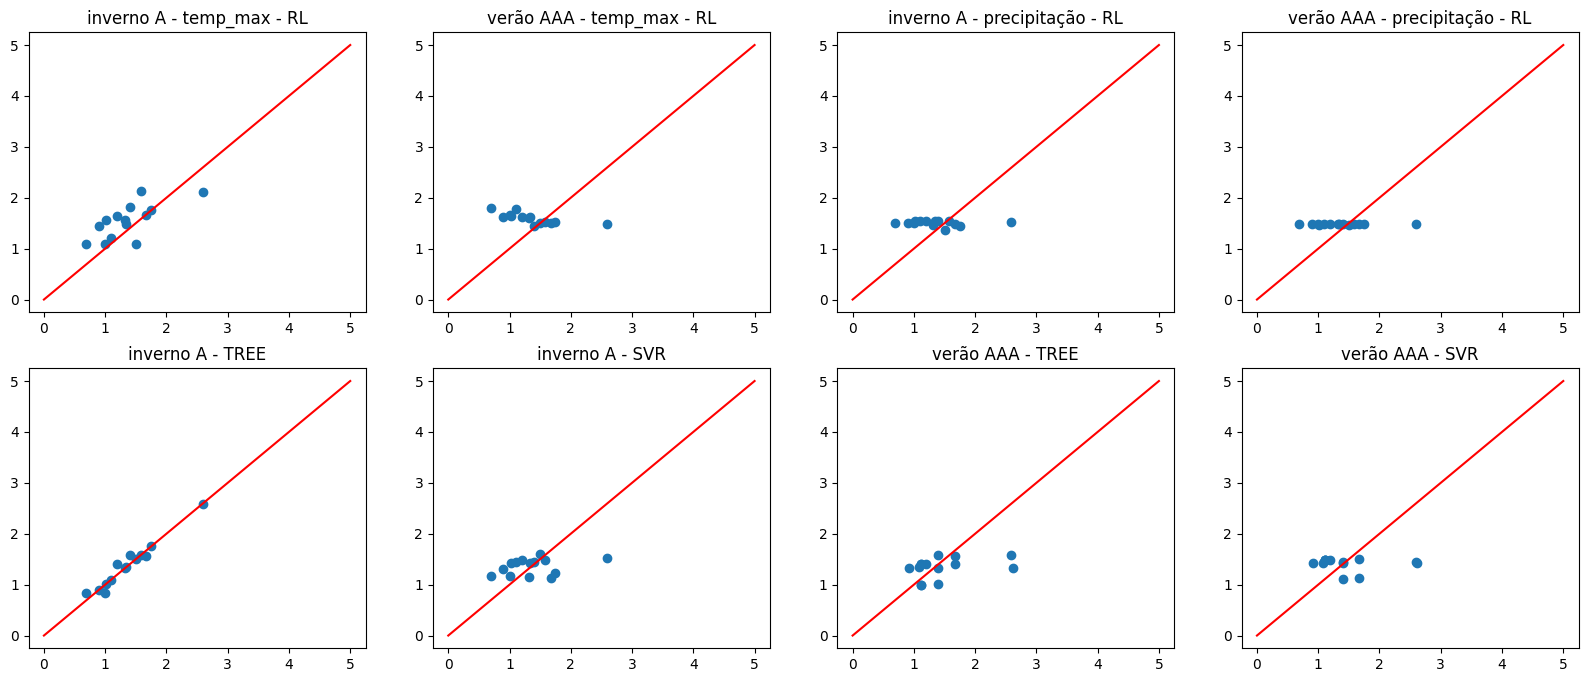

In [167]:
# Plota gráficos de regressão linear dos testes
import numpy as np
fig,ax = plt.subplots(nrows=2,ncols=4,figsize=(20,8))

x = np.arange(0,6)
y = x
ax[0,0].scatter(yi_test,yi_pred1)
ax[0,0].plot(x,y,'r')
ax[0,0].set_title('inverno A - temp_max - RL')
ax[0,1].scatter(yi_test,yv_pred1)
ax[0,1].plot(x,y,'r')
ax[0,1].set_title('verão AAA - temp_max - RL')

ax[0,2].scatter(yi_test,yi_pred2)
ax[0,2].plot(x,y,'r')
ax[0,2].set_title('inverno A - precipitação - RL')
ax[0,3].scatter(yi_test,yv_pred2)
ax[0,3].plot(x,y,'r')
ax[0,3].set_title('verão AAA - precipitação - RL')

ax[1,0].scatter(yi_test,yi_predArvore)
ax[1,0].plot(x,y,'r')
ax[1,0].set_title('inverno A - TREE')
ax[1,1].scatter(yi_test,yi_predSVR)
ax[1,1].plot(x,y,'r')
ax[1,1].set_title('inverno A - SVR')

ax[1,2].scatter(yv_test,yv_predArvore)
ax[1,2].plot(x,y,'r')
ax[1,2].set_title('verão AAA - TREE')
ax[1,3].scatter(yv_test,yv_predSVR)
ax[1,3].plot(x,y,'r')
ax[1,3].set_title('verão AAA - SVR')

plt.show()

In [168]:
# os valores que mais se adequaram conforme os gráficos de regressão anteriores foram 
# inverno A - TREE e verão AAA - TREE, juntamente com os coeficientes de determinação e os erros médios
# absolutos e quadráticos
preços_verão_tree = pd.DataFrame(yv_predArvore)
preços_verão_tree.columns = ['Preço_kg_Cenoura_prev']
print ('verão AAA')
print (preços_verão_tree.sort_values(by='Preço_kg_Cenoura_prev', ascending=False).head(5))

print(' ')
print ('inverno A')
preços_inverno_tree = pd.DataFrame(yi_predArvore)
preços_inverno_tree.columns = ['Preço_kg_Cenoura_prev']
print(preços_inverno_tree.sort_values(by='Preço_kg_Cenoura_prev', ascending=False).head(5))

verão AAA
    Preço_kg_Cenoura_prev
6                    1.58
11                   1.58
10                   1.56
1                    1.40
5                    1.40
 
inverno A
    Preço_kg_Cenoura_prev
12                   2.59
4                    1.75
0                    1.58
8                    1.58
3                    1.56


## Faz o Deploy dos Modelos

In [169]:
# os modelos que tiveram melhor resultado foram
from joblib import dump

dump(regi_Arvore, 'modelos/mod_invernoA_rtree.joblib')
dump(regv_Arvore, 'modelos/mod_verãoAAA_rtree.joblib')

['modelos/mod_verãoAAA_rtree.joblib']